# **Spotify data 2023 EDA**

As a music🎵 enthusiast, I was interested in exploring this **[Spotify dataset](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023)** to uncover interesting insights and correlations. I have performed a few analyses, and you can check them out.

* **Number of Tracks released each year**

* **Artist Analysis**:
1. Analyze the number of tracks each artist features in. Pick the top 20 artists. 
1. Examine if the audio features `bpm`, `danceability_%`, `valence_%`, `energy_%`, `acousticness_%`, `liveness_%`, `speechiness_%`,`key`,`mode` tend to co-occur together in the 20 most streamed tracks.
1. Categorical Features: 
   * analyse the Distribution of `key_mode`s
   * examine how `key` and `mode` trend over the years.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

file = '/kaggle/input/top-spotify-songs-2023/spotify-2023.csv'

music = pd.read_csv(file,encoding='latin1') #utf8 doesn't work

music.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


In [2]:
# Add an 'Index' column to the music dataset
music['Index'] = range(0,953)

music_cleaned = music.copy() # create a copy to preserve the original dataset

music_cleaned.head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Index
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,0
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,1
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,2
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,3
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,4


# **Data Cleaning**

In [3]:
# Number of rows and columns
music_cleaned.shape

(953, 25)

In [4]:
music_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [5]:
# Get Missing values
music_cleaned.isnull().sum() # missing values in in_shazam_charts and key columns

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
Index                    0
dtype: int64

In [6]:
# Drop the in_shazam_charts column
music_cleaned = music_cleaned.drop(columns='in_shazam_charts')

In [7]:
# Find all rows with missing key values 
missing_key_rows = music_cleaned[music_cleaned.isnull().any(axis=1)]

# Select only the desired columns
missing_columns = missing_key_rows[['track_name','artist(s)_name','key', 'mode']]

# The first 50 missing values
print(missing_columns.head(50))

                                            track_name  \
12                                             Flowers   
17   What Was I Made For? [From The Motion Picture ...   
22                                    I Wanna Be Yours   
35                                     Los del Espacio   
44    Barbie World (with Aqua) [From Barbie The Album]   
46                                     I Ain't Worried   
58                                                 S91   
59                                            cardigan   
124                                     Por las Noches   
127                                   Watermelon Sugar   
134                                                505   
135  Calling (Spider-Man: Across the Spider-Verse) ...   
144                                              QUEMA   
151                                                Bye   
152                                       Danza Kuduro   
156                      Jimmy Cooks (feat. 21 Savage)   
161           

In [8]:
# The last 45 missing values 
print(missing_columns.tail(45))

                                            track_name  \
506                          We Don't Talk About Bruno   
511                                     Less Than Zero   
531                                  Happier Than Ever   
532                  Moth To A Flame (with The Weeknd)   
537  All Too Well (10 Minute Version) (Taylor's Ver...   
552                          Every Angel is Terrifying   
554             Peaches (feat. Daniel Caesar & Giveon)   
559         Better Days (NEIKED x Mae Muller x Polo G)   
560                                       Life Goes On   
575                          LA FAMA (with The Weeknd)   
578                                      Dos Oruguitas   
586                                         DANCE CRIP   
599                                          positions   
603                             HEARTBREAK ANNIVERSARY   
609                           Happier Than Ever - Edit   
644                  When Iï¿½ï¿½ï¿½m Gone (with Katy    
652       The 

I used  [Songbpm](https://songbpm.com/) to determine the key and mode for each track. I saved the values in a **CSV file** and then imputed them in order.

In [9]:
# Load the excel file containing the right keys 
file = "/kaggle/input/spotify-missing-keys/Spotify Missing Keys.xlsx"

spotify_missing_keys = pd.read_excel(file)

spotify_missing_keys[['Index','key','mode']].head(50)

,Index,key,mode
0,12,C,Major
1,17,C,Major
2,22,C,Minor
3,35,C,Major
4,44,C,Major
5,46,C,Major
6,58,C,Minor
7,59,C,Minor
8,124,A,Minor
9,127,C,Major


In [10]:
spotify_missing_keys[['Index','key','mode']].tail(45)

,Index,key,mode
50,506,C,Minor
51,511,C,Major
52,531,C,Major
53,532,G#,Minor
54,537,C,Major
55,552,C,Major
56,554,C,Major
57,559,C,Minor
58,560,C,Major
59,575,C,Minor


In [11]:
# Iterate over all rows with missing keys
for index, row in music_cleaned.iterrows():
    if pd.isnull(row['key']):
        if index == 124:
            music_cleaned.at[index, 'key'] = 'A'
        elif index == 405:
            music_cleaned.at[index, 'key'] = 'E'
        elif index == 532:
            music_cleaned.at[index, 'key'] = 'G#'
        else:
            music_cleaned.at[index, 'key'] = 'C'

In [12]:
music_cleaned.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
Index                   0
dtype: int64

In [13]:
# Inspect some rows that originally had keys and those that had missing keys

music_cleaned.iloc[[0,2,9,12,124,405,532]]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Index
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,0
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,2
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,D,Minor,81,56,48,21,0,8,33,9
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716,300,...,C,Major,71,65,68,6,0,3,7,12
124,Por las Noches,Peso Pluma,1,2021,6,11,457,24,330346424,8,...,A,Major,81,39,60,31,0,7,3,124
405,Pink Venom,BLACKPINK,1,2022,8,19,1963,16,551305895,57,...,E,Major,80,71,69,2,0,27,10,405
532,Moth To A Flame (with The Weeknd),"The Weeknd, Swedish House Mafia",2,2021,10,22,7495,17,611994237,114,...,G#,Minor,56,16,67,0,0,11,4,532


In [14]:
# New column 'key_mode'
music_cleaned['key_mode']=music_cleaned['key']+' '+music_cleaned['mode']  # Example; A Major, C# Major

In [15]:
music_cleaned.head(20)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Index,key_mode
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,Major,80,89,83,31,0,8,4,0,B Major
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,Major,71,61,74,7,0,10,4,1,C# Major
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,Major,51,32,53,17,0,31,6,2,F Major
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,Major,55,58,72,11,0,11,15,3,A Major
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,Minor,65,23,80,14,63,11,6,4,A Minor
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,Major,92,66,58,19,0,8,24,5,C# Major
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,Minor,67,83,76,48,0,8,3,6,F Minor
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,Major,67,26,71,37,0,11,4,7,F Major
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,Minor,85,22,62,12,0,28,9,8,C# Minor
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,Minor,81,56,48,21,0,8,33,9,D Minor


In [16]:
music_cleaned.describe() # describe numerical data

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Index
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165,476.000000
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888,275.251703
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000,0.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000,238.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000,476.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000,714.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000,952.000000


In [17]:
# Uncomment and run this code if you want to get the cleaned csv file. 
# output_file = music_cleaned.to_csv('music_cleaned.csv')

# Number of Tracks released each year

Most people listen to songs regardless of the year of release. You'll see that in this 2023 dataset.

In [18]:
# Number of Tracks released in each year
years = [2023,2022,2021,2020,2019,2018]

for year in years:
    tracks_by_year = music_cleaned[music_cleaned['released_year'] == year].shape[0]
    print(f"Number of Tracks released in {year}: {tracks_by_year}")
    
tracks_before_2018 = music_cleaned[music_cleaned['released_year'] < 2018].shape[0]
print('Number of Tracks released before 2018:',tracks_before_2018)

Number of Tracks released in 2023: 175
Number of Tracks released in 2022: 402
Number of Tracks released in 2021: 119
Number of Tracks released in 2020: 37
Number of Tracks released in 2019: 36
Number of Tracks released in 2018: 10
Number of Tracks released before 2018: 174


# Artist Analysis

## Top 20 Artists with the most Tracks

In [19]:
# Get the Top 20 Artists with the most tracks in the dataset
artist_counts =music_cleaned['artist(s)_name'].value_counts()
top_artists = artist_counts.head(20)

top_artists

artist(s)_name
Taylor Swift        34
The Weeknd          22
Bad Bunny           19
SZA                 19
Harry Styles        17
Kendrick Lamar      12
Morgan Wallen       11
Ed Sheeran           9
BTS                  8
Feid                 8
Drake, 21 Savage     8
Labrinth             7
Olivia Rodrigo       7
NewJeans             6
Doja Cat             6
Billie Eilish        5
Drake                4
IVE                  4
Arctic Monkeys       4
Karol G              4
Name: count, dtype: int64

# Barplot of the Top 20 artists with most tracks

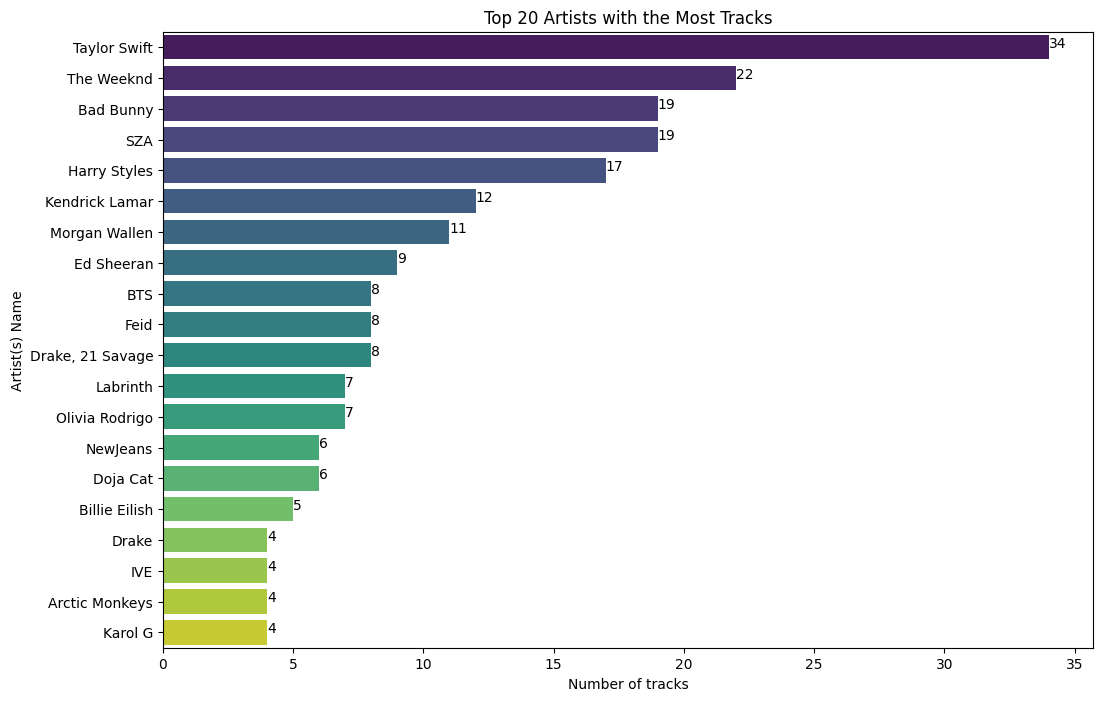

In [20]:
# Barplot of Top 20 artists with most tracks

plt.figure(figsize=(12, 8))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.xlabel('Number of tracks')
plt.ylabel('Artist(s) Name')
plt.title('Top 20 Artists with the Most Tracks')

# Add data labels to the bars
for index, value in enumerate(top_artists.values):
    plt.annotate(str(value), xy=(value, index), ha='left')
    
plt.show()

# Impute vs Drop

I imputed the missing keys instead of dropping the 95 rows because it would have affected the ranking of other artists in the top 20 list. Taylor Swift would still be the top either way.

# Top 20 Most Streamed Tracks

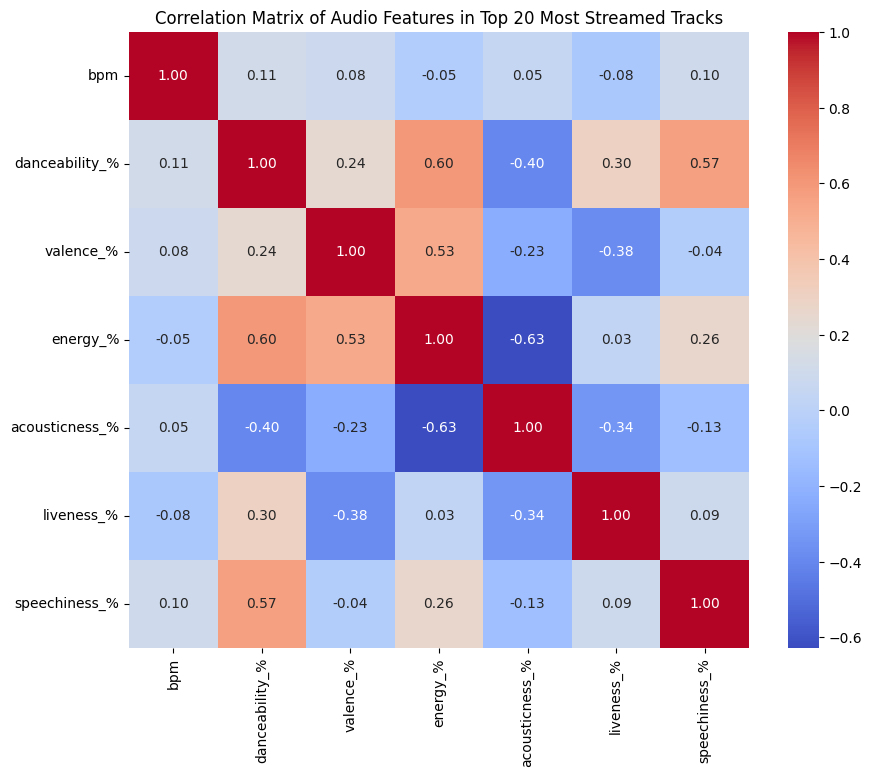

In [21]:
#  Top 20 Most Streamed tracks
top_twenty_most_streamed_tracks = music_cleaned.sort_values(by='streams',ascending = False).iloc[:20]

top_twenty_most_streamed_tracks[['track_name','artist(s)_name','streams','key','mode']]

# List the audio features
audio_features = ['bpm', 'danceability_%', 'valence_%', 'energy_%',
                  'acousticness_%', 'liveness_%', 'speechiness_%']

top_twenty_audio_features = top_twenty_most_streamed_tracks[audio_features]

# Calculate Correlation Matrix
correlation_matrix = top_twenty_audio_features.corr()

# Plot the Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Audio Features in Top 20 Most Streamed Tracks')
plt.show()

1. Energy and Danceability (0.60 correlation):

A correlation of 0.60 indicates a positive and moderately strong relationship.
Energetic music often makes you want to move your body and dance.

2. Energy and Valence (0.53 correlation):

The correlation of 0.53 is again positive but slightly weaker than the energy-danceability correlation.
Energetic music can often be uplifting, exciting, or motivating.

# Distribution of Key_Modes

I added another column `key_mode`to combine the `key` and `mode `columns.

In [22]:
key_mode_counts = music_cleaned['key_mode'].value_counts()
print('Keys used', key_mode_counts)

Keys used key_mode
C# Major    73
C Major     73
G Major     66
D Major     66
G# Major    63
C# Minor    47
B Minor     46
F Minor     45
E Minor     45
F Major     44
A Major     43
F# Minor    43
B Major     35
A Minor     33
F# Major    30
G Minor     30
A# Minor    30
G# Minor    29
A# Major    27
D# Minor    21
C Minor     19
E Major     18
D Minor     15
D# Major    12
Name: count, dtype: int64


In [23]:
import plotly.express as px

# Select relevant columns
data = music_cleaned[['released_year', 'key', 'mode']]

# Create a scatter plot
fig = px.scatter(data, x='released_year', y='key', color='mode',
                 title='Trends of Key Modes Over Time',
                 labels={'released_year': 'Released Year', 'key': 'Key'},
                 width=800, height=600)

# Show plot
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


When listening to music one day with my sister she said that many songs these days sound **'sad'**. I studied music in highschool so I knew she meant that more songs are in the **Minor mode**. The figure above shows that trend.

Feel free to do more analyses using this spotify dataset. Contact me for any changes and feedback

***Explore and be teachable***